# Renaming Screenshots with GPT Vision

This notebook demonstrates how to use the vision capabilites of `gpt-4-turbo` in combination with magentic's structured outputs to rename all those screenshots cluttering your desktop.

In [1]:
# List all screenshots

from pathlib import Path

path_desktop = Path.home() / "Desktop"
screenshot_paths = list(path_desktop.glob("Screenshot*.png"))

for screenshot_path in screenshot_paths:
    print(screenshot_path.name)

Screenshot 2024-04-20 at 10.49.08 PM Small.png
Screenshot 2024-04-20 at 10.50.04 PM Small.png
Screenshot 2024-04-20 at 10.50.57 PM Small.png


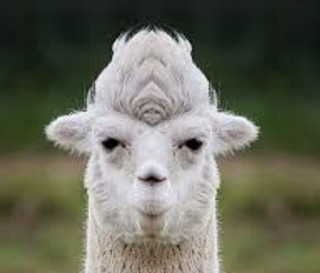

In [2]:
# Display the first screenshot

from IPython.display import Image, display


def diplay_image(image_path):
    display(Image(data=image_path.read_bytes(), width=400))


diplay_image(screenshot_paths[0])

In [3]:
# Define desired output for each screenshot
# Include a description field to allow the LLM to think before naming the file

from pydantic import BaseModel, Field


class ScreenshotDetails(BaseModel):
    description: str = Field(
        description="A brief description of the screenshot, including details that will be useful for naming it."
    )
    filename: str = Field(
        description="An appropriate file name for this image, excluding the file extension."
    )

In [4]:
# Create a prompt-function to return details given an image

from magentic import OpenaiChatModel, Placeholder, UserMessage, chatprompt
from magentic.vision import UserImageMessage


@chatprompt(
    UserMessage("Describe the screenshot, then provide a suitable file name."),
    UserImageMessage(Placeholder(bytes, "image")),
    model=OpenaiChatModel("gpt-4-turbo"),
)
def describe_image(image: bytes) -> ScreenshotDetails: ...

Screenshot 2024-04-20 at 10.49.08 PM Small.png


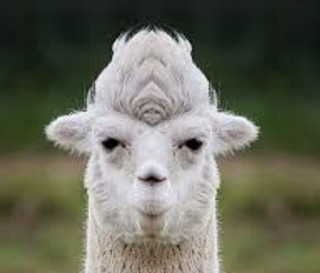

The image shows the face of a white alpaca looking directly at the camera. The alpaca has a unique and stylish mohawk-like hairstyle. The background is blurred with a hint of green, suggesting an outdoor setting, likely a field.

Renamed to: stylish-alpaca-face.png


---


Screenshot 2024-04-20 at 10.50.04 PM Small.png


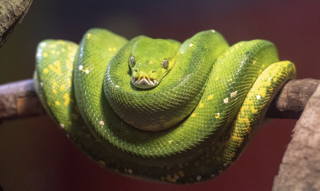

A close-up image of a vibrant green snake coiled around a tree branch. The snake features a beautiful pattern of yellow spots and has a focused gaze. The background is softly blurred, emphasizing the snake in the foreground.

Renamed to: green_snake_coiled_on_branch.png


---


Screenshot 2024-04-20 at 10.50.57 PM Small.png


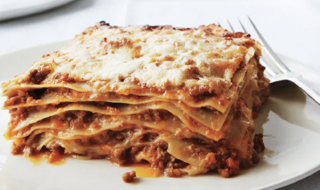

The image displays a close-up view of a serving of lasagna on a white plate. The lasagna appears richly layered with melted cheese on top and a golden-brown crust, suggesting it is freshly baked and possibly contains a meaty sauce between the pasta sheets.

Renamed to: close_up_lasagna_on_plate.png


---




In [5]:
# Rename all screenshots using the prompt-function

for path_screenshot in path_desktop.glob("Screenshot*.png"):
    print(path_screenshot.name)
    diplay_image(path_screenshot)

    image_bytes = path_screenshot.read_bytes()
    image_details = describe_image(image_bytes)
    print(image_details.description)

    new_path = path_screenshot.with_stem(image_details.filename)
    path_screenshot.rename(new_path)
    print("\nRenamed to:", new_path.name)
    print("\n\n---\n\n")